Классификационный отчёт:
              precision    recall  f1-score   support

           0       0.26      0.22      0.24       149
           1       0.24      0.23      0.23       148
           2       0.24      0.24      0.24       146
           3       0.26      0.31      0.28       157

    accuracy                           0.25       600
   macro avg       0.25      0.25      0.25       600
weighted avg       0.25      0.25      0.25       600



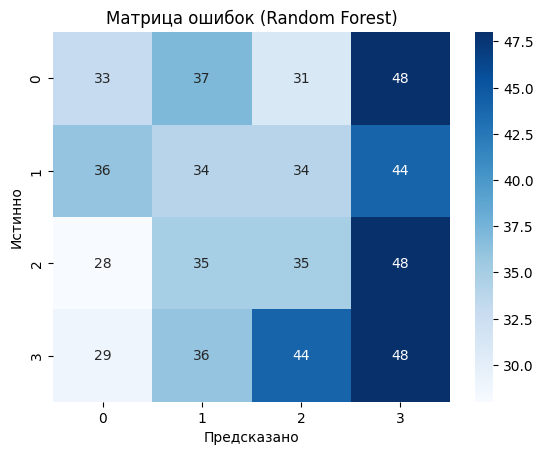

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка и очистка
df = pd.read_csv("sample_data/Global_Cybersecurity_Threats_2015-2024.csv")
df = df.dropna()

# Кодируем строковые признаки
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Целевая переменная
target_col = "Security Vulnerability Type"
y = df[target_col]
X = df.drop(target_col, axis=1)

# Стандартизация признаков
X = StandardScaler().fit_transform(X)

# Разделение выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Обучение модели
rf = RandomForestClassifier(
    n_estimators=100, max_depth=10, random_state=42, class_weight="balanced"
)
rf.fit(X_train, y_train)

# Предсказание
y_pred = rf.predict(X_test)

# Отчёт
print("Классификационный отчёт:")
print(classification_report(y_test, y_pred))

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Матрица ошибок (Random Forest)")
plt.xlabel("Предсказано")
plt.ylabel("Истинно")
plt.show()